In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정


In [2]:
import pandas as pd
df = pd.read_csv('./dataset/chat_df.csv')
df

,성별,나이,학력,전공,학습이해도,사용기간,만족도,학습효과,인지,감성,사회,심리,몰입감,상호작용,불편함
0,남,20대,대졸,기술,51 ~ 70%,2개월,4.5,4.9,5.0,3.0,1.0,1.0,5,5.000000,3.0
1,여,30대,고졸,NaN,51 ~ 70%,3,3.8,3.7,4.0,3.5,2.5,2.0,3,3.000000,4.0
2,여,20대,대졸,경제학,51 ~ 70%,2개월,4.7,4.6,4.0,2.0,1.0,1.0,1,4.000000,4.0
3,남,20대,대졸,기계공학,51 ~ 70%,4,4.8,4.6,5.0,4.5,1.0,2.5,1,4.666667,4.0
4,여,20대,대재,글로벌MICE,51 ~ 70%,3,4.4,4.1,4.0,4.5,1.5,3.0,2,2.666667,5.0
5,남,20대,대졸,행정학,71 ~ 80%,3개월,4.0,3.9,4.5,3.5,2.0,2.0,4,4.000000,3.0
6,남,20대,대졸,전자정보통신,51 ~ 70%,3개월,4.0,4.0,3.5,4.0,3.5,3.5,4,3.000000,3.0
7,여,20대,대졸,경영학과,50% 미만,3,3.9,3.5,4.0,2.5,2.5,1.0,3,3.666667,5.0
8,남,20대,대졸,컴퓨터소프트웨어,50% 미만,1,4.4,3.5,4.5,2.0,1.0,3.0,1,4.666667,3.0
9,남,40대 이상,대졸,수학,71 ~ 80%,3,4.3,3.9,4.5,3.5,3.5,3.5,4,3.666667,2.0


In [4]:
def categorize_major(major):
    if major in ['기술', '기계공학', '전자정보통신', '컴퓨터소프트웨어', '수학','의료공학과','생명과학',\
                 'Management Information System','빅데이터']:
        return '과학'
    elif major in ['경제학','글로벌MICE','행정학','경영학과','무역학과']:
        return '사회과학'
    else:  
        return '기타'
    
df['전공'] = df['전공'].apply(categorize_major)

In [6]:
df['전공'].value_counts()

과학      9
기타      7
사회과학    5
Name: 전공, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df,columns):
    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

In [10]:
# str.extract() 메소드는 정규표현식 (regular expression)을 사용하여 문자열에서 특정 패턴에 맞는 부분을 추출한다.
# 여기서 사용된 정규표현식은 한 개의 숫자를 의미합니다.

cdf = df.copy()
cdf['사용기간'] = cdf['사용기간'].astype(str)
cdf['사용기간'] = cdf['사용기간'].str.extract('(\d)')
cdf['나이'] = cdf['나이'].str.extract('(\d+)')
cdf = label_encode(cdf,['성별','학력','전공','사용기간','나이'])
cdf.head()

,성별,나이,학력,전공,학습이해도,사용기간,만족도,학습효과,인지,감성,사회,심리,몰입감,상호작용,불편함
0,0,0,2,0,51 ~ 70%,1,4.5,4.9,5.0,3.0,1.0,1.0,5,5.000000,3.0
1,1,1,0,1,51 ~ 70%,2,3.8,3.7,4.0,3.5,2.5,2.0,3,3.000000,4.0
2,1,0,2,2,51 ~ 70%,1,4.7,4.6,4.0,2.0,1.0,1.0,1,4.000000,4.0
3,0,0,2,0,51 ~ 70%,3,4.8,4.6,5.0,4.5,1.0,2.5,1,4.666667,4.0
4,1,0,1,2,51 ~ 70%,2,4.4,4.1,4.0,4.5,1.5,3.0,2,2.666667,5.0


In [16]:
cdf['이해도'] = cdf['학습이해도'].apply(lambda x:0 if x =='50% 미만'
                               else (1 if x == '51 ~ 70%' else (2 if x == '71 ~ 80%' else 
                                                                (3 if x =='81 ~ 90%' else 4))))

In [18]:
cdf = cdf.drop('학습이해도',axis=1)
cdf.head()

,성별,나이,학력,전공,사용기간,만족도,학습효과,인지,감성,사회,심리,몰입감,상호작용,불편함,이해도
0,0,0,2,0,1,4.5,4.9,5.0,3.0,1.0,1.0,5,5.000000,3.0,1
1,1,1,0,1,2,3.8,3.7,4.0,3.5,2.5,2.0,3,3.000000,4.0,1
2,1,0,2,2,1,4.7,4.6,4.0,2.0,1.0,1.0,1,4.000000,4.0,1
3,0,0,2,0,3,4.8,4.6,5.0,4.5,1.0,2.5,1,4.666667,4.0,1
4,1,0,1,2,2,4.4,4.1,4.0,4.5,1.5,3.0,2,2.666667,5.0,1


In [19]:
cdf.불편함.value_counts()

3.0    7
4.0    6
2.0    4
5.0    2
1.0    1
Name: 불편함, dtype: int64

In [20]:
cdf['불편함'] = cdf['불편함'].fillna(cdf['불편함'].median())
cdf.불편함.isnull().sum()

0

In [21]:
cdf = cdf[['성별','나이', '학력', '전공', '사용기간', '인지', '감성', '사회', '심리', 
           '몰입감', '상호작용', '불편함', '이해도', '학습효과', '만족도']]
cdf.head()

,성별,나이,학력,전공,사용기간,인지,감성,사회,심리,몰입감,상호작용,불편함,이해도,학습효과,만족도
0,0,0,2,0,1,5.0,3.0,1.0,1.0,5,5.000000,3.0,1,4.9,4.5
1,1,1,0,1,2,4.0,3.5,2.5,2.0,3,3.000000,4.0,1,3.7,3.8
2,1,0,2,2,1,4.0,2.0,1.0,1.0,1,4.000000,4.0,1,4.6,4.7
3,0,0,2,0,3,5.0,4.5,1.0,2.5,1,4.666667,4.0,1,4.6,4.8
4,1,0,1,2,2,4.0,4.5,1.5,3.0,2,2.666667,5.0,1,4.1,4.4


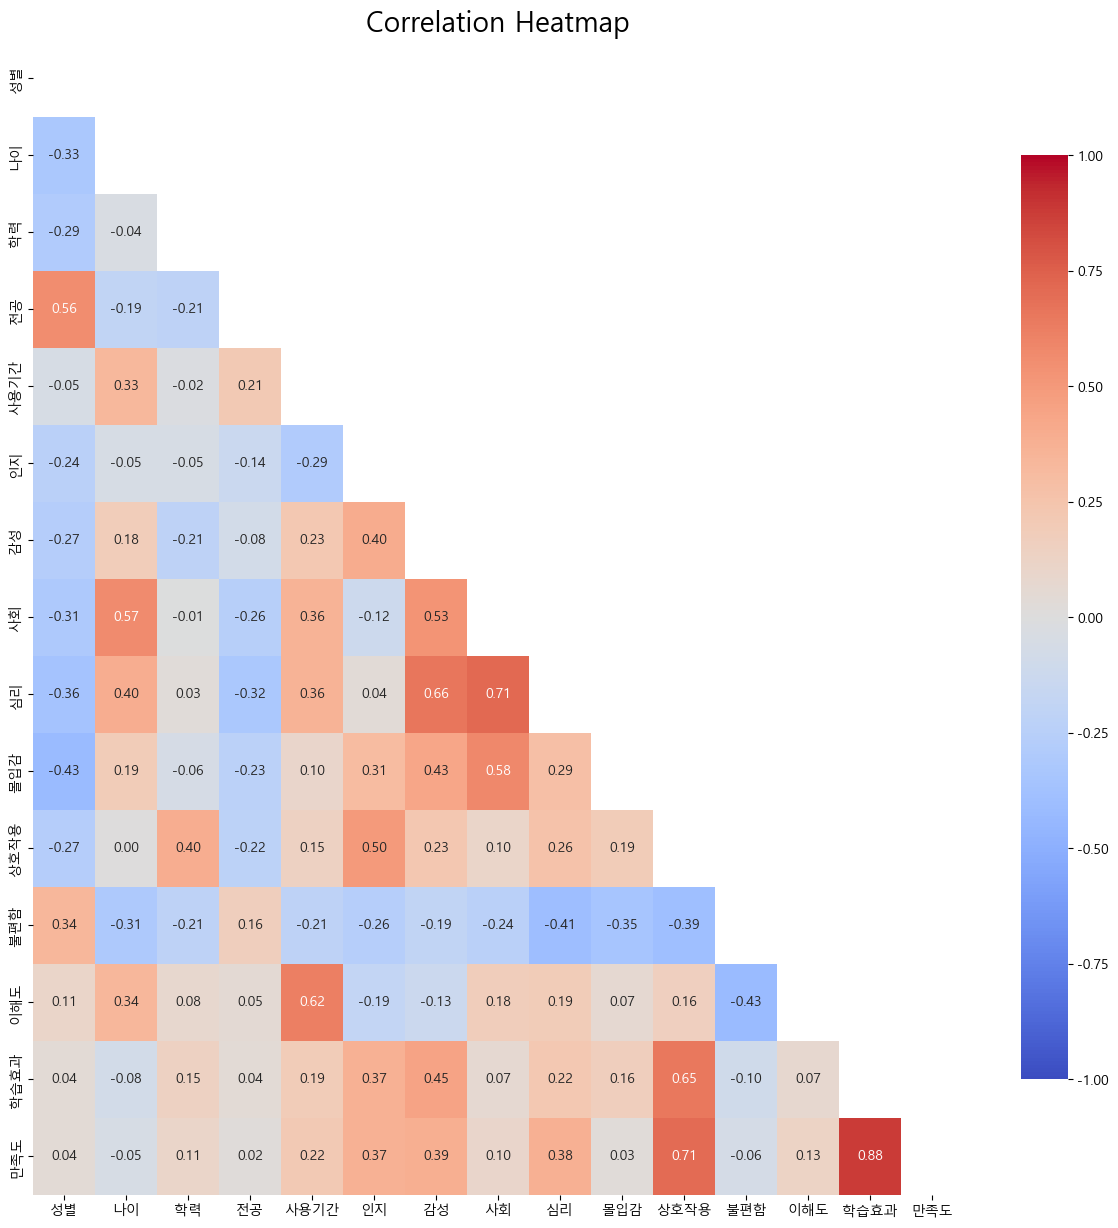

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

corr = cdf.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15,15))

#sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', vmin = -1, vmax=1, cbar_kws{'shrink':.8})
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap', fontsize = 20)
plt.show()

In [29]:
import matplotlib.font_manager as fm
font_list = [f.name for f in fm.fontManager.ttflist]

han_fonts = [font_name for font_name in font_list if  'Gothic' in font_name]
print(han_fonts)

['Franklin Gothic Heavy', 'Franklin Gothic Heavy', 'Copperplate Gothic Bold', 'Franklin Gothic Demi', 'Showcard Gothic', 'Malgun Gothic', 'Franklin Gothic Book', 'Hancom Gothic', 'Franklin Gothic Demi', 'MS Gothic', 'Hancom Gothic', 'Franklin Gothic Medium', 'Franklin Gothic Medium', 'Copperplate Gothic Bold', 'Century Gothic', 'Yu Gothic', 'Yu Gothic', 'Franklin Gothic Book', 'Century Gothic', 'Franklin Gothic Demi Cond', 'Franklin Gothic Heavy', 'Copperplate Gothic Light', 'HYGothic-Extra', 'Franklin Gothic Demi', 'Yu Gothic', 'Century Gothic', 'Malgun Gothic', 'Malgun Gothic', 'Franklin Gothic Heavy', 'Malgun Gothic', 'Century Gothic', 'Yu Gothic', 'Century Gothic', 'Franklin Gothic Demi Cond', 'HYGothic-Medium', 'HYGothic-Extra', 'Franklin Gothic Demi', 'Copperplate Gothic Light', 'Century Gothic', 'Malgun Gothic', 'Yu Gothic', 'Franklin Gothic Book', 'Franklin Gothic Medium Cond', 'Hancom Gothic', 'Century Gothic', 'MS Gothic', 'Malgun Gothic', 'Yu Gothic', 'Showcard Gothic', 'Fra

In [ ]:
학습만족도 
학습효과

In [34]:
cdf[['인지','감성','상호작용','심리','불편함']]

,인지,감성,상호작용,심리,불편함
0,5.0,3.0,5.000000,1.0,3.0
1,4.0,3.5,3.000000,2.0,4.0
2,4.0,2.0,4.000000,1.0,4.0
3,5.0,4.5,4.666667,2.5,4.0
4,4.0,4.5,2.666667,3.0,5.0
5,4.5,3.5,4.000000,2.0,3.0
6,3.5,4.0,3.000000,3.5,3.0
7,4.0,2.5,3.666667,1.0,5.0
8,4.5,2.0,4.666667,3.0,3.0
9,4.5,3.5,3.666667,3.5,2.0


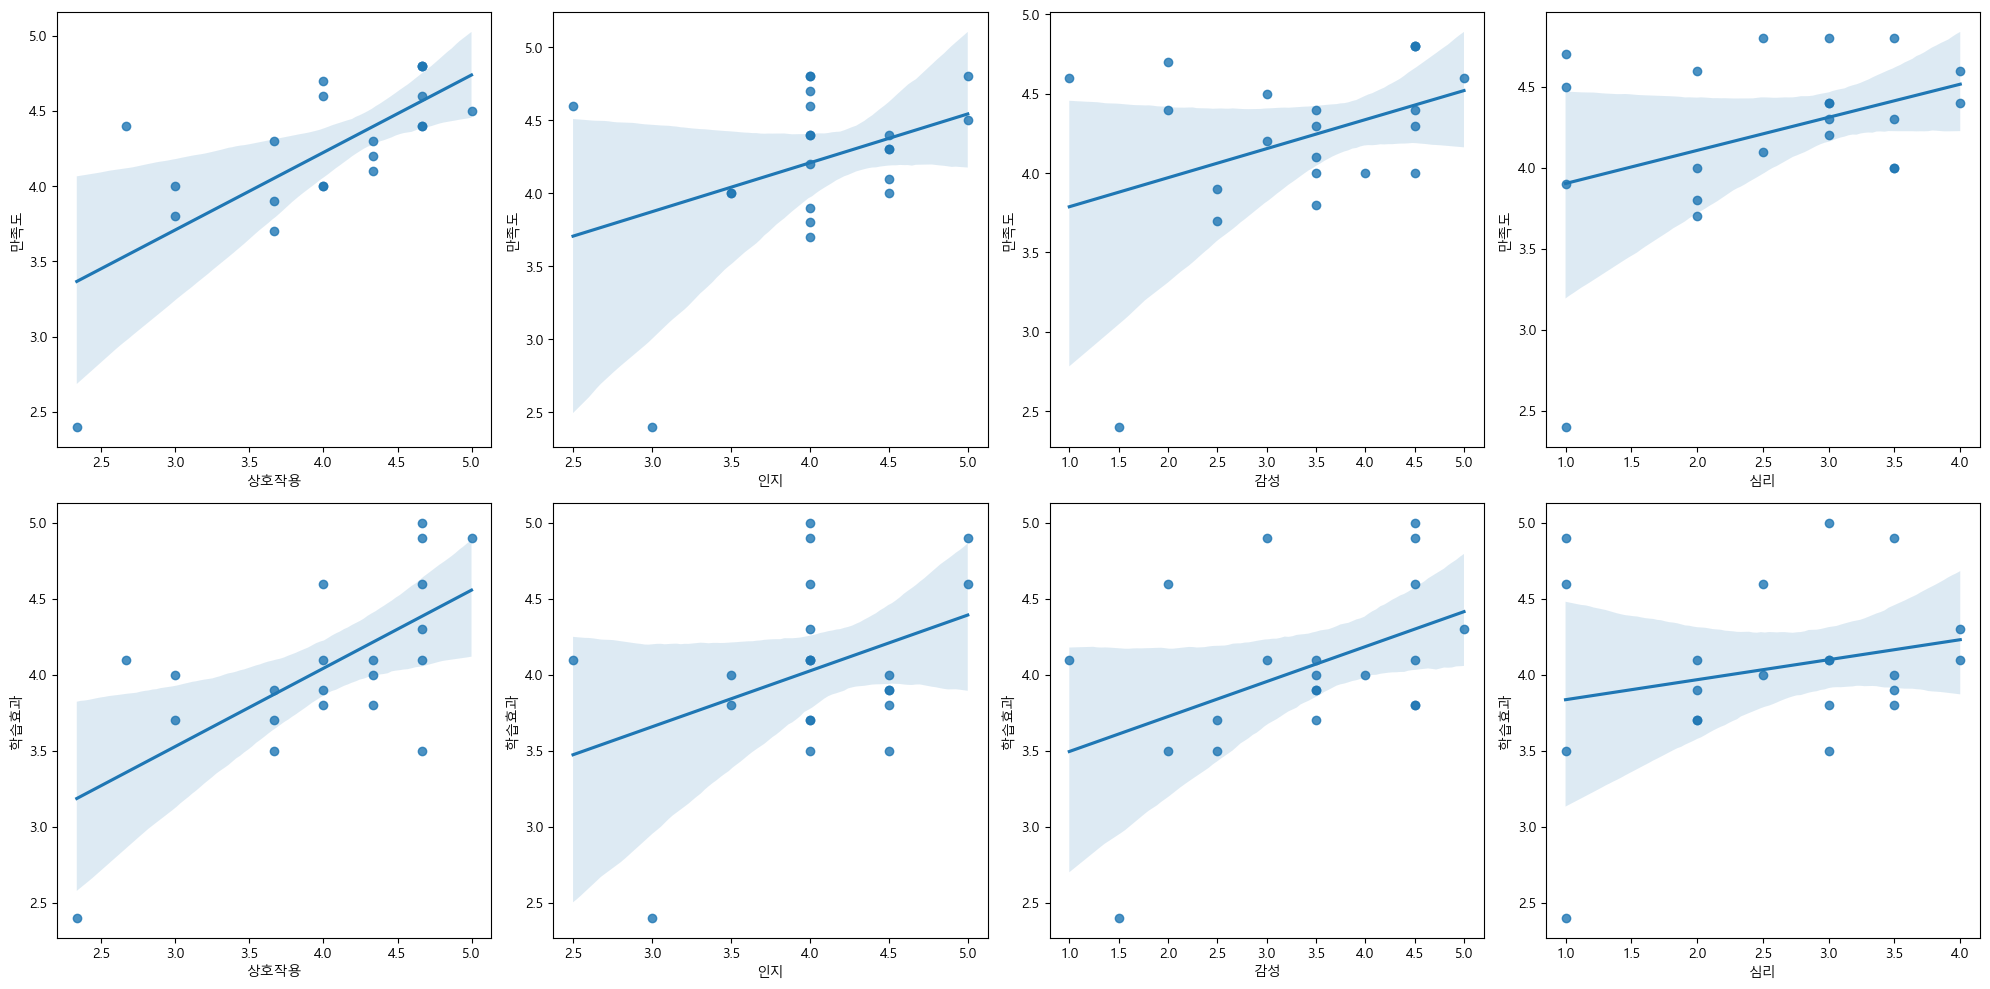

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fig,axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

sns.regplot(data=cdf, x='상호작용', y='만족도', ax=axs[0,0])
sns.regplot(data=cdf, x='인지', y='만족도', ax=axs[0,1])
sns.regplot(data=cdf, x='감성', y='만족도', ax=axs[0,2])
sns.regplot(data=cdf, x='심리', y='만족도', ax=axs[0,3])
sns.regplot(data=cdf, x='상호작용', y='학습효과', ax=axs[1,0])
sns.regplot(data=cdf, x='인지', y='학습효과', ax=axs[1,1])
sns.regplot(data=cdf, x='감성', y='학습효과', ax=axs[1,2])
sns.regplot(data=cdf, x='심리', y='학습효과', ax=axs[1,3])

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='학습효과', ylabel='Count'>

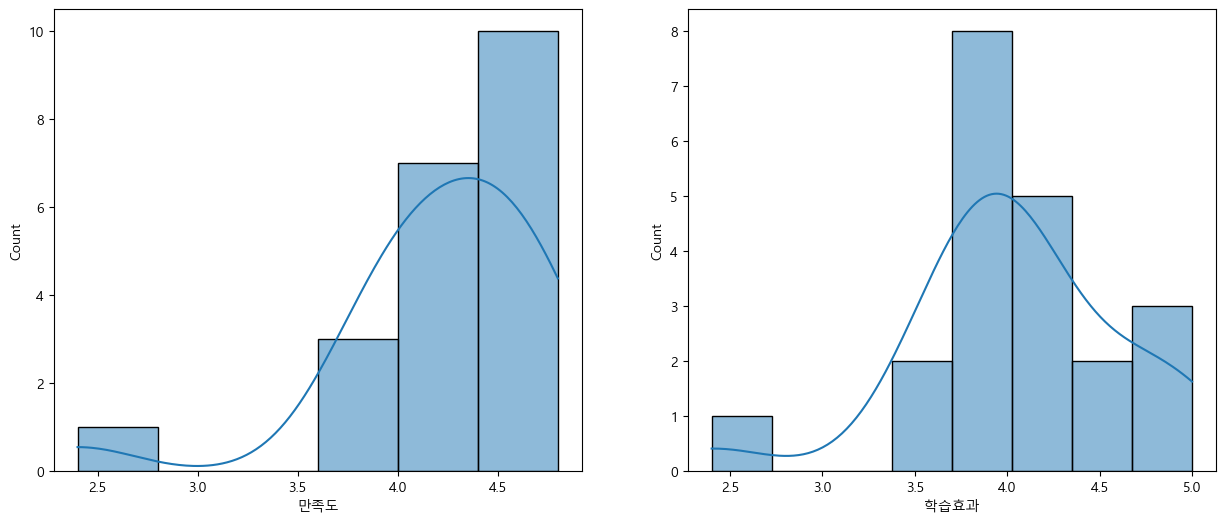

In [37]:
import seaborn as sns

fig,ax = plt.subplots(1,2,figsize=(15,6))

sns.histplot(data=cdf, x='만족도', kde=True, ax=ax[0])
sns.histplot(data=cdf, x='학습효과', kde=True, ax=ax[1])

In [38]:
cdf.to_csv('cdf.csv',index= False)
cdf = pd.read_csv('cdf.csv')
cdf.head()

,성별,나이,학력,전공,사용기간,인지,감성,사회,심리,몰입감,상호작용,불편함,이해도,학습효과,만족도
0,0,0,2,0,1,5.0,3.0,1.0,1.0,5,5.000000,3.0,1,4.9,4.5
1,1,1,0,1,2,4.0,3.5,2.5,2.0,3,3.000000,4.0,1,3.7,3.8
2,1,0,2,2,1,4.0,2.0,1.0,1.0,1,4.000000,4.0,1,4.6,4.7
3,0,0,2,0,3,5.0,4.5,1.0,2.5,1,4.666667,4.0,1,4.6,4.8
4,1,0,1,2,2,4.0,4.5,1.5,3.0,2,2.666667,5.0,1,4.1,4.4


In [39]:
cdf1 = cdf[['인지', '감성', '심리', '상호작용', '불편함', '만족도']]
cdf2 = cdf[['인지', '감성', '심리', '상호작용', '불편함', '학습효과']]

In [40]:
cdf1.head()

,인지,감성,심리,상호작용,불편함,만족도
0,5.0,3.0,1.0,5.000000,3.0,4.5
1,4.0,3.5,2.0,3.000000,4.0,3.8
2,4.0,2.0,1.0,4.000000,4.0,4.7
3,5.0,4.5,2.5,4.666667,4.0,4.8
4,4.0,4.5,3.0,2.666667,5.0,4.4


In [41]:
# 만족도

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_data = cdf1.drop(['만족도'], axis=1, inplace=False)
y_target = cdf1['만족도']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))

# 데이터 수가 적을 때에는 train test split보다는 교차검증이 낫다.

MSE : 0.067, RMSE : 0.260


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(np.round(rmse_scores,2))
print(np.round(avg_rmse,2))

[0.61 0.32 0.49 0.66 0.66]
0.55


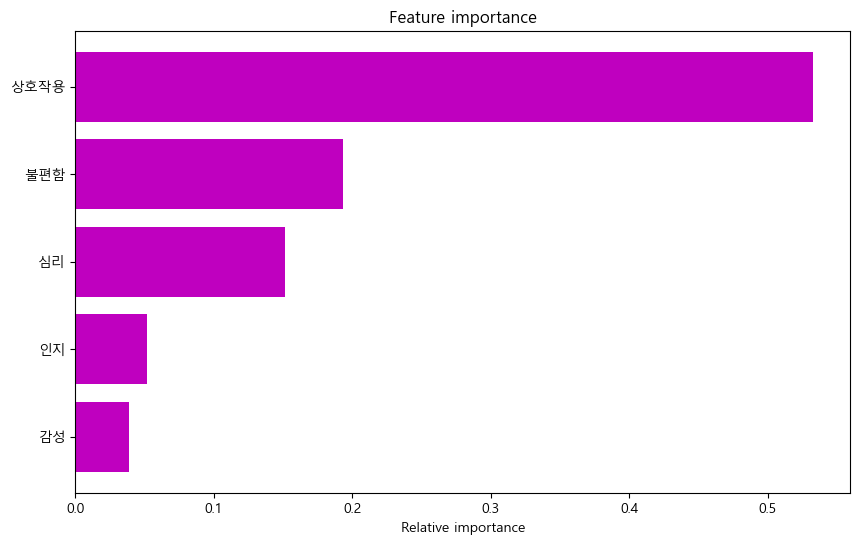

In [67]:
# feature importance 시각화

lr.fit(X_data, y_target)
importance = np.abs(lr.coef_)
feature_names = X_data.columns
indices = np.argsort(importance)

plt.figure(figsize=(10,6))
plt.title('Feature importance')
plt.barh(range(len(indices)), importance[indices], color='m', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_data = cdf2.drop(['학습효과'], axis=1, inplace=False)
y_target = cdf2['학습효과']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))

MSE : 0.106, RMSE : 0.326


In [69]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(np.round(rmse_scores,2))
print(np.round(avg_rmse,2))

[0.72 0.69 0.53 0.59 0.78]
0.66


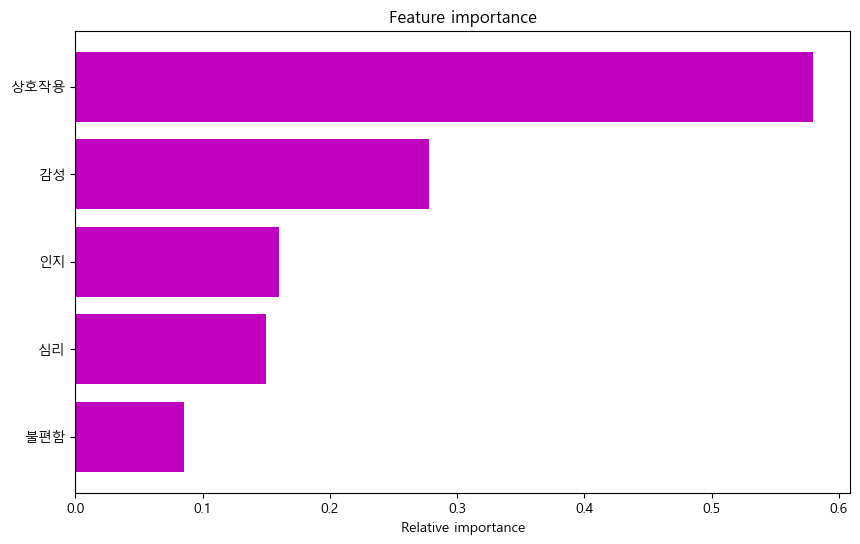

In [70]:
lr.fit(X_data, y_target)
importance = np.abs(lr.coef_)
feature_names = X_data.columns
indices = np.argsort(importance)

plt.figure(figsize=(10,6))
plt.title('Feature importance')
plt.barh(range(len(indices)), importance[indices], color='m', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

In [75]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.linear_model import Ridge
def get_linear_reg_eval(model_name=None, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('######', model_name,'######')
        
    for param in params:
        if model_name =='Ridge':model =Ridge(alpha=param)
        elif model_name =='Lasso':model =Lasso(alpha=param)
        elif model_name =='ElasticNet':model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error',cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores)) 
        print('alpha {0}일 때 5 fold 세트 평균 rmse: {1:.3f}'.format(param, avg_rmse))
        
        model.fit(X_data_n,y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_,index=X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname]=coeff
    return coeff_df

In [76]:
ridge_alphas = [0.0,0.05,0.1,0.5]
coeff_elestic_df = get_linear_reg_eval('Ridge', params = ridge_alphas, X_data_n=X_data, y_target_n = y_target )

###### Ridge ######
alpha 0.0일 때 5 fold 세트 평균 rmse: 0.661
alpha 0.05일 때 5 fold 세트 평균 rmse: 0.658
alpha 0.1일 때 5 fold 세트 평균 rmse: 0.655
alpha 0.5일 때 5 fold 세트 평균 rmse: 0.636


In [77]:
lasso_alphas = [0.0,0.05,0.1,0.5]
coeff_elestic_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n=X_data, y_target_n = y_target )

###### Lasso ######
alpha 0.0일 때 5 fold 세트 평균 rmse: 0.661
alpha 0.05일 때 5 fold 세트 평균 rmse: 0.546
alpha 0.1일 때 5 fold 세트 평균 rmse: 0.535
alpha 0.5일 때 5 fold 세트 평균 rmse: 0.589
